# Substitution mechanisms notebook

In this notebook, the effect of all substitution mechanisms is analysed. 

This notebook is built up in the following way:
1. Some libraries are imported.
2. Functions are defined that will be used later.
3. Element-for-element substitution figures
4. Process-for-element substitution figures
5. Magnet-for-magnet substitution figures
6. Component-for-component substitution figures, subdivided in (6.1) electric cars and (6.2) wind turbines

## 1. Import libraries \& functions

In [1]:
from __future__ import (absolute_import, print_function, division, unicode_literals)
from ema_workbench import (Model, RealParameter, CategoricalParameter, ScalarOutcome, Constant,\
                           Policy, perform_experiments, ema_logging, \
                           TimeSeriesOutcome, perform_experiments,save_results, load_results)
#from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.analysis import (clusterer, plotting, Density, pairs_plotting, get_ex_feature_scores, \
                                    RuleInductionType, feature_scoring)
from ema_workbench.analysis import scenario_discovery_util as sdutil
from ema_workbench.analysis.plotting_util import do_titles,do_ylabels, TIME
import ema_workbench.analysis.plotting_util as plt_util
from ema_workbench.analysis.plotting import group_by_envelopes, single_envelope, plot_lines_with_envelopes, prepare_data 
from ema_workbench.analysis.plotting import simple_kde, group_density, plot_envelope, simple_density
from ema_workbench.analysis.plotting import lines, envelopes, kde_over_time, multiple_densities
from ema_workbench.analysis.pairs_plotting import pairs_scatter, pairs_density
import ema_workbench.analysis.cart as cart
from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter,pairs_density)
import numpy as np
import seaborn as sns #; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
TIME_LABEL = 'Time'

import importlib
importlib.reload(sdutil)
importlib.reload(cart)

import itertools
import datetime
import math
import matplotlib.gridspec as gridspec
import scipy.stats.kde as kde
from matplotlib.colors import ColorConverter
from matplotlib.collections import PolyCollection, PathCollection
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
from matplotlib.patches import ConnectionPatch
import matplotlib.font_manager as fm
import matplotlib as mpl

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. I

## 2. Defining functions \& import data

In [7]:
def find_colors(ax):
    color_converter = ColorConverter()
    all_colors = []
    for line in ax.get_lines():
        orig_color = line.get_color()
        if orig_color not in all_colors:
            all_colors.ap
    return all_colors

In [8]:
def save_fig(fig, dir, name, dpi=300):
    '''save a high res and a low res version of the figure in the specified
    directory, using the label i.
    Parameters
    ----------
    fig : a Figure instance
    dir : str
    the directory where figures are to be saved
    name : str
    dpi : int, optional
    '''
    fig.savefig('{}/fig_{}_{}dpi.png'.format(dir, name, dpi), dpi=dpi,
    bbox_inches='tight', format='png')

In [9]:
def change_fontsize(fig, fs=11.5):
    '''Change fontsize of figure items to specified size'''
    for ax in fig.axes:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fs)
        try:
            parasites = ax.parasites
        except AttributeError:
            pass
        else:
            for parisite in parasites:
                for axis in parisite.axis.values():
                    axis.major_ticklabels.set_fontsize(fs)
                    axis.label.set_fontsize(fs)
            for axis in ax.axis.values():
                axis.major_ticklabels.set_fontsize(fs)
                axis.label.set_fontsize(fs)
        if ax.legend_ != None:
            for entry in ax.legend_.get_texts():
                entry.set_fontsize(fs)
        for entry in ax.texts:
            entry.set_fontsize(fs)
        for entry in ax.tables:
            entry.set_fontsize(fs)

In [10]:
def nice_lines (exp,out,out_to_show,
                group_by= None,
                density=None,title=None,
                exp_to_show = None,
                grouping_specifiers = None,
                legend = False,
                convert_to_t = False,
                convert_to_kt = False,
                convert_to_Mt = False,
                zero = False ,
                yupperlim = None,
                ylabel = False,
                alpha = None,
                sizex = None,
                sizey = None):
    
    if convert_to_kt == True:
        out[title] = out[out_to_show]/1000000
        lines(experiments = exp, outcomes = out,
            experiments_to_show = exp_to_show,
            outcomes_to_show = title, legend = legend,
            group_by = group_by, density = density,
            grouping_specifiers = grouping_specifiers)
    else:
        out[title] = out[out_to_show]
        lines(experiments = exp, outcomes = out, experiments_to_show = exp_to_show, outcomes_to_show = title,legend = legend, group_by = group_by, density = density, grouping_specifiers = grouping_specifiers)
    
    fig = plt.gcf()
    fig.set_size_inches(6,3)
    
    if sizex:
        fig.set_size_inches(sizex,sizey)
    ax = fig.get_axes()
    
    if zero == True:
        ax[0].set_ylim([0,yupperlim])
    ax[0].set_xticklabels(labels_time)
    
    if ylabel:
        ax[0].set(ylabel=ylabel)
    
    if alpha:
        for line in ax[0].get_lines():
            line.set_alpha(alpha)
    short_title = title.replace(" ","")
    change_fontsize(fig)
    sns.despine()
 #   save_fig(fig,wd,short_title)
# fig.savefig(wd+paradigm+short_title+'.jpg')
    plt.show()

In [11]:
def get_ex_feature_scores_topx (variable,top_nr):
    x= experiments.drop(['model', 'policy'], axis=1)
    y = outcomes[variable]
    all_scores = []
    top_x = set()
    for i in range(2, y.shape[1], 8):
        data = y[:, i]
        scores = get_ex_feature_scores(x, data,
        mode=RuleInductionType.REGRESSION)[0]
        top_x |= set(scores.nlargest(top_nr, 1).index.values)
        all_scores.append(scores)
    all_scores = pd.concat(all_scores, axis=1, sort=False)
    all_scores = all_scores.loc[top_x, :]
    all_scores.columns = np.arange(2000, 2050, 2)
    all_scores = all_scores.sort_values(by = [2000], ascending = False)
    list_of_cols_to_drop = []
    for i in all_scores.T:
        if max(all_scores.T[i]) < 0.3:
            list_of_cols_to_drop.append(i)
    all_scores_flipped = all_scores.T.drop(columns=list_of_cols_to_drop)
    all_scores = all_scores_flipped.T
    return (all_scores)

In [41]:
def plot_heatmap_overtime (scores,title):
    sns.heatmap(scores, cmap='viridis')
    fig = plt.gcf()
    ax = fig.get_axes()
    ax[0].set_xticklabels(np.arange(2000, 2050, 2))
    fig.autofmt_xdate()
    fig.set_size_inches(15,3)
    fig.suptitle('Extra trees feature scores for variables with highest impact on '+title)
    shorttitle = title.replace(" ","")
    #fig.savefig(wd+shorttitle)
    plt.show()

In [13]:
labels_time = [2000, 2010, 2020, 2030, 2040, 2050]
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['legend.frameon'] = False

In [14]:
results = load_results('Results/Model_runs.tar.gz')
experiments, outcomes = results

## 3. Element-for-element substitution

In [23]:
outcomes["Fraction Nd of LREE"] = outcomes['Material composition NdFeB magnet low coercivity[Neodymium]']\
                                / outcomes['LREE and HREE content NdFeB magnet low coercivity[Neodymium]']
outcomes["Fraction Pr of LREE"] = outcomes['Material composition NdFeB magnet low coercivity[Praseodymium]']\
                                / outcomes['LREE and HREE content NdFeB magnet low coercivity[Neodymium]']
outcomes["Fraction Dy of HREE"] = outcomes['Material composition NdFeB magnet low coercivity[Dysprosium]']\
                                / outcomes['LREE and HREE content NdFeB magnet low coercivity[Dysprosium]']
outcomes["Fraction Tb of HREE"] = outcomes['Material composition NdFeB magnet low coercivity[Terbium]']\
                                / outcomes['LREE and HREE content NdFeB magnet low coercivity[Dysprosium]']

C:\Users\User\Anaconda3\lib\site-packages\ema_workbench\analysis\plotting_util.py:372: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)


[Text(0, 0.5, '100'),
 Text(0, 5.5, '99'),
 Text(0, 10.5, '98'),
 Text(0, 15.5, '97'),
 Text(0, 20.5, '96'),
 Text(0, 25.5, '95'),
 Text(0, 30.5, '94'),
 Text(0, 35.5, '93'),
 Text(0, 40.5, '92'),
 Text(0, 45.5, '91'),
 Text(0, 50.5, '90'),
 Text(0, 55.5, '89'),
 Text(0, 60.5, '88'),
 Text(0, 65.5, '87'),
 Text(0, 70.5, '86'),
 Text(0, 75.5, '85'),
 Text(0, 80.5, '84'),
 Text(0, 85.5, '83'),
 Text(0, 90.5, '82'),
 Text(0, 95.5, '81')]

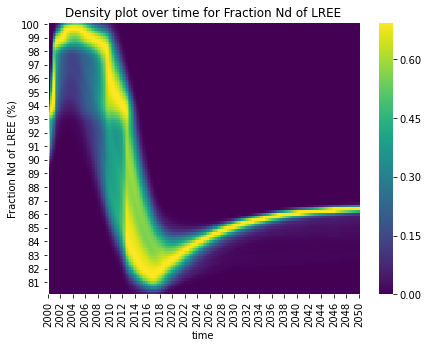

In [24]:
kde_over_time(experiments ,outcomes, outcomes_to_show = 'Fraction Nd of LREE')
plt.title('Density plot over time for Fraction Nd of LREE')
fig = plt.gcf()
fig.set_size_inches(7,5)
ax = fig.get_axes()
ax[0].set_xticklabels(np.arange(2000, 2051, 2))
ax[0].set_ylabel('Fraction Nd of LREE (%)')
ax[0].set_yticklabels(180-np.arange(80, 100, 1))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


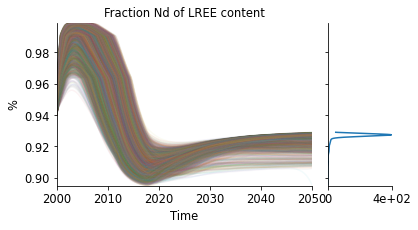

In [25]:
nice_lines(experiments, outcomes, out_to_show = "Fraction Nd of LREE", \
           legend=True, density=Density.KDE, \
           ylabel = "%", title="Fraction Nd of LREE content", alpha=0.05)

C:\Users\User\Anaconda3\lib\site-packages\ema_workbench\analysis\plotting_util.py:372: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)


[Text(0, 0.5, '20'),
 Text(0, 5.5, '19'),
 Text(0, 10.5, '18'),
 Text(0, 15.5, '17'),
 Text(0, 20.5, '16'),
 Text(0, 25.5, '15'),
 Text(0, 30.5, '14'),
 Text(0, 35.5, '13'),
 Text(0, 40.5, '12'),
 Text(0, 45.5, '11'),
 Text(0, 50.5, '10'),
 Text(0, 55.5, '9'),
 Text(0, 60.5, '8'),
 Text(0, 65.5, '7'),
 Text(0, 70.5, '6'),
 Text(0, 75.5, '5'),
 Text(0, 80.5, '4'),
 Text(0, 85.5, '3'),
 Text(0, 90.5, '2'),
 Text(0, 95.5, '1')]

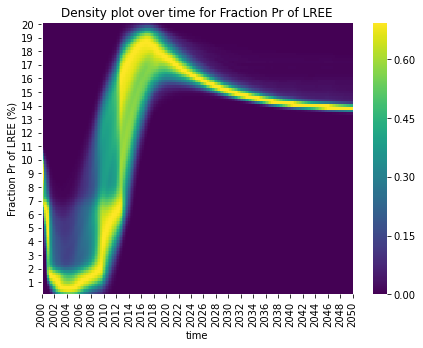

In [26]:
kde_over_time(experiments ,outcomes, outcomes_to_show = 'Fraction Pr of LREE')
plt.title('Density plot over time for Fraction Pr of LREE')
fig = plt.gcf()
fig.set_size_inches(7,5)
ax = fig.get_axes()
ax[0].set_xticklabels(np.arange(2000, 2051, 2))
ax[0].set_ylabel('Fraction Pr of LREE (%)')
ax[0].set_yticklabels(20-np.arange(0, 20, 1))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


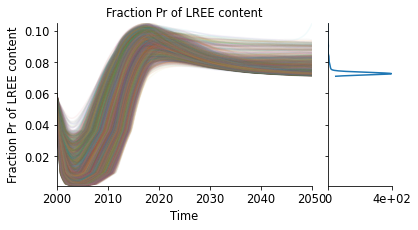

In [27]:
nice_lines(experiments, outcomes, out_to_show = "Fraction Pr of LREE", \
           legend=True, density=Density.KDE, \
           title="Fraction Pr of LREE content", alpha=0.05)

C:\Users\User\Anaconda3\lib\site-packages\ema_workbench\analysis\plotting_util.py:372: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)


[Text(0, 0.5, '100'),
 Text(0, 5.5, '95'),
 Text(0, 10.5, '90'),
 Text(0, 15.5, '85'),
 Text(0, 20.5, '80'),
 Text(0, 25.5, '75'),
 Text(0, 30.5, '70'),
 Text(0, 35.5, '65'),
 Text(0, 40.5, '60'),
 Text(0, 45.5, '55'),
 Text(0, 50.5, '50'),
 Text(0, 55.5, '45'),
 Text(0, 60.5, '40'),
 Text(0, 65.5, '35'),
 Text(0, 70.5, '30'),
 Text(0, 75.5, '25'),
 Text(0, 80.5, '20'),
 Text(0, 85.5, '15'),
 Text(0, 90.5, '10'),
 Text(0, 95.5, '5')]

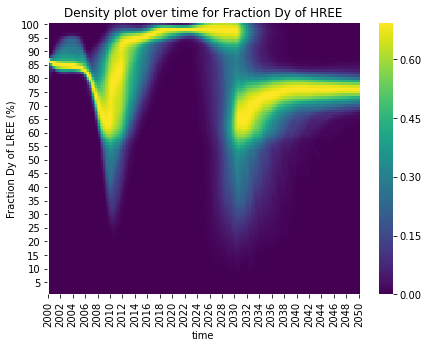

In [28]:
kde_over_time(experiments ,outcomes, outcomes_to_show = 'Fraction Dy of HREE')
plt.title('Density plot over time for Fraction Dy of HREE')
fig = plt.gcf()
fig.set_size_inches(7,5)
ax = fig.get_axes()
ax[0].set_xticklabels(np.arange(2000, 2051, 2))
ax[0].set_ylabel('Fraction Dy of LREE (%)')
ax[0].set_yticklabels(100-np.arange(0, 100, 5))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


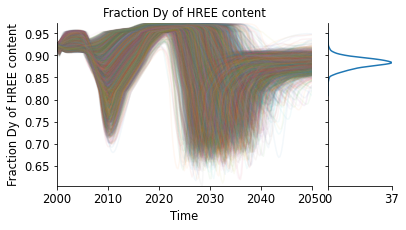

In [29]:
nice_lines(experiments, outcomes, out_to_show = "Fraction Dy of HREE", \
           legend=True, density=Density.KDE, \
           title="Fraction Dy of HREE content", alpha=0.05)

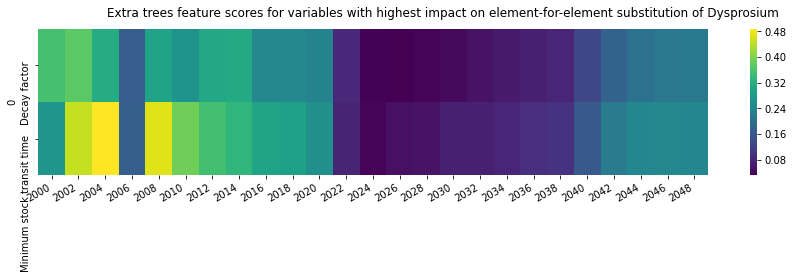

In [42]:
all_scores_dy_el_subst = get_ex_feature_scores_topx('Fraction Dy of HREE',3)
plot_heatmap_overtime(all_scores_dy_el_subst,title = 'element-for-element substitution of Dysprosium')

[Text(0, 0.5, '100'),
 Text(0, 5.5, '95'),
 Text(0, 10.5, '90'),
 Text(0, 15.5, '85'),
 Text(0, 20.5, '80'),
 Text(0, 25.5, '75'),
 Text(0, 30.5, '70'),
 Text(0, 35.5, '65'),
 Text(0, 40.5, '60'),
 Text(0, 45.5, '55'),
 Text(0, 50.5, '50'),
 Text(0, 55.5, '45'),
 Text(0, 60.5, '40'),
 Text(0, 65.5, '35'),
 Text(0, 70.5, '30'),
 Text(0, 75.5, '25'),
 Text(0, 80.5, '20'),
 Text(0, 85.5, '15'),
 Text(0, 90.5, '10'),
 Text(0, 95.5, '5')]

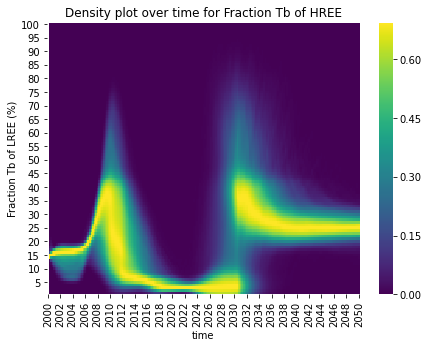

In [33]:
kde_over_time(experiments ,outcomes, outcomes_to_show = 'Fraction Tb of HREE')
plt.title('Density plot over time for Fraction Tb of HREE')
fig = plt.gcf()
fig.set_size_inches(7,5)
ax = fig.get_axes()
ax[0].set_xticklabels(np.arange(2000, 2051, 2))
ax[0].set_ylabel('Fraction Tb of LREE (%)')
ax[0].set_yticklabels(100-np.arange(0, 100, 5))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


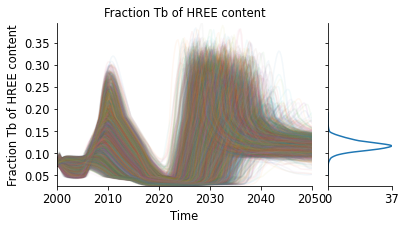

In [34]:
nice_lines(experiments, outcomes, out_to_show = "Fraction Tb of HREE", \
           legend=True, density=Density.KDE, \
           title="Fraction Tb of HREE content", alpha=0.05)

## 4. Process-for-element substitution

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


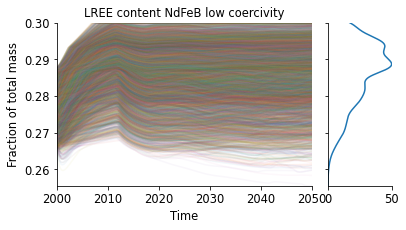

In [35]:
nice_lines(experiments, outcomes, out_to_show = "LREE and HREE content NdFeB magnet low coercivity[Neodymium]", \
           legend=True, density=Density.KDE, ylabel="Fraction of total mass", \
           title="LREE content NdFeB low coercivity", alpha=0.05)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


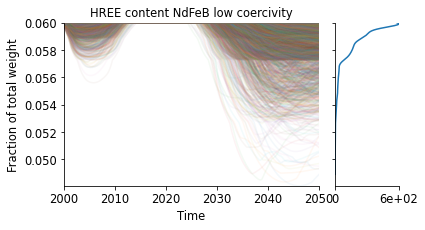

In [36]:
nice_lines(experiments, outcomes, out_to_show = "LREE and HREE content NdFeB magnet low coercivity[Dysprosium]", \
           legend=True, density=Density.KDE, ylabel="Fraction of total weight",\
           title="HREE content NdFeB low coercivity", alpha=0.05)

## 5. Magnet-for-magnet substitution

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


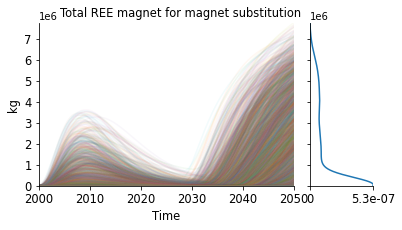

In [37]:
nice_lines(experiments, outcomes, out_to_show = "Magnet for magnet substitution", \
           legend=True, density=Density.KDE, \
           title="        Total REE magnet for magnet substitution", alpha=0.05, ylabel="kg")

In [38]:
outcomes["Total REE demand"] = outcomes["Total demand REE[Terbium]"] + outcomes["Total demand REE[Dysprosium]"] +\
                                outcomes["Total demand REE[Praseodymium]"] + outcomes["Total demand REE[Neodymium]"]

In [39]:
outcomes["Fraction magnet-for-magnet substitution of total demand"] = outcomes["Magnet for magnet substitution"] /\
                                                                        outcomes["Total REE demand"]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


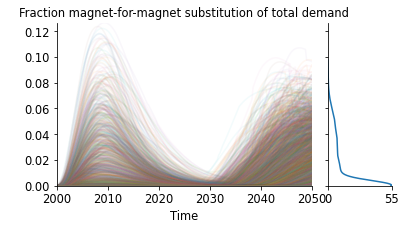

In [40]:
nice_lines(experiments, outcomes, out_to_show = "Fraction magnet-for-magnet substitution of total demand", \
           legend=True, density=Density.KDE, \
           title="Fraction magnet-for-magnet substitution of total demand", alpha=0.05, ylabel=" ")

## 6. Component-for-component substitution

### Electric cars

In [ ]:
plot_clusters ('Fraction of cars in use with PM',experiments, 'EV clusters', zero = True, alpha = 0.05)
fig = plt.gcf()
fig.set_size_inches(9,3.5)
#fig.savefig(wd+"Fraction_cars_with_NdFeB_clustered"+'.jpg')

In [ ]:
nice_lines(experiments, outcomes, out_to_show = 'Fraction of cars in use with PM per car type[BEV]', \
           legend=True, density=Density.KDE, \
           ylabel = ' ', title="Fraction of BEV cars in use with NdFeB magnet", alpha=0.05)

In [ ]:
plot_clusters ('Fraction of cars in use with PM per car type[BEV]',experiments, 'EV clusters', zero = True, alpha= 0.05)
fig = plt.gcf()
fig.set_size_inches(9,3.5)

#### Group by technology readiness

In [ ]:
experiments["Technology readiness EV"] = experiments["Switch technology readiness ASM high"]

In [ ]:
experiments["Switch technology readiness ASM high"] = experiments["Switch technology readiness ASM high"].astype(int)
experiments["Switch technology readiness SRM"] = experiments["Switch technology readiness SRM"].astype(int)
experiments["Technology readiness EV"] = experiments["Technology readiness EV"].astype(int)

In [ ]:
for row in range(len(experiments["Switch technology readiness ASM high"])):
    if experiments["Switch technology readiness ASM high"][row] == 0 and experiments["Switch technology readiness SRM"][row] == 0:
        experiments["Technology readiness EV"][row] = 0
    elif experiments["Switch technology readiness ASM high"][row] == 0 and experiments["Switch technology readiness SRM"][row] == 1:
        experiments["Technology readiness EV"][row] = 1
    elif experiments["Switch technology readiness ASM high"][row] == 1 and experiments["Switch technology readiness SRM"][row] == 0:
        experiments["Technology readiness EV"][row] = 2
    elif experiments["Switch technology readiness ASM high"][row] == 1 and experiments["Switch technology readiness SRM"][row] == 1:
        experiments["Technology readiness EV"][row] = 3

In [ ]:
experiments["Switch technology readiness ASM high"] = experiments["Switch technology readiness ASM high"].astype(object)
experiments["Switch technology readiness SRM"] = experiments["Switch technology readiness SRM"].astype(object)
experiments["Technology readiness EV"] = experiments["Technology readiness EV"].astype(object)

In [ ]:
nice_lines(experiments, outcomes, out_to_show = 'Fraction of cars in use with PM', 
           legend=True, density=Density.KDE, group_by='Technology readiness EV',
           grouping_specifiers = {'No ASM high rpm & no SRM' :0, 'SRM': 1, 'ASM high rpm': 2, 'ASM high rpm \n& SRM': 3},
           ylabel = "Fraction of cars in use with PM", title="Fraction of cars in use with PM", alpha = 0.1, sizex=9, sizey=3)

### 6.2 Component-for-component substitution wind

In [ ]:
nice_lines(experiments, outcomes, out_to_show = 'Fraction installed wind capacity with NdFeB', \
           legend=True, density=Density.KDE,\
           ylabel = "Fraction of total", title="Fraction installed wind capacity with NdFeB magnet", alpha=0.05)

In [ ]:
nice_lines(experiments, outcomes, out_to_show = 'Fraction installed wind capacity with NdFeB',
           legend=True, density=Density.KDE, group_by='Switch technology readiness HTS', 
           grouping_specifiers = {'No HTS' :0, 'HTS': 1},
           ylabel = 'Fraction of total', title="Fraction of wind capacity in use with NdFeB magnet", alpha=0.05)

In [ ]:
nice_lines(experiments, outcomes, out_to_show = 'Fraction installed wind capacity with NdFeB per wind location[Offshore]',
           legend=True, density=Density.KDE, group_by='Switch technology readiness HTS', 
           grouping_specifiers = {'No HTS' :0, 'HTS': 1},
           ylabel = 'Fraction of total', title="Fraction of offshore wind in use with NdFeB magnet", alpha=0.05)

In [ ]:
nice_lines(experiments, outcomes, out_to_show = 'Fraction installed wind capacity with NdFeB per wind location[Onshore]', \
           legend=True, density=Density.KDE, group_by='Switch technology readiness HTS',\
           ylabel = "Fraction of total", title="Fraction of installed onshore wind with NdFeB magnet", alpha = 0.1)